In [2]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
import difflib
import spacy
import spacy.cli
import nltk
# spacy.cli.download("en_core_web_sm")
from nltk.corpus import stopwords
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', 'r') as f:
    data = json.load(f)
# data[0]
print(len(data[23]['reviews']))

7


In [87]:
# for index in range(len(data)):
def get_topics(index):
    positive_topics = []
    negative_topics = []
    for i in range(len(data[index]['reviews'])):
        if data[index]["reviews"][i]['review_helpfulness'] >= 0.5:
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                positive_topics.append(data[index]["reviews"][i]['review_topics'][j])
        if data[index]["reviews"][i]['review_helpfulness'] < 0.5:
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                negative_topics.append(data[index]["reviews"][i]['review_topics'][j])
    return positive_topics, negative_topics, data[index]['product_title'][0]


positive_topics, negative_topics, title = get_topics(26)
positive_topics = [topic for topic in positive_topics if topic != 'none']
negative_topics = [topic for topic in negative_topics if topic != 'none']
len(positive_topics), len(negative_topics), title

(6, 15, 'ASUS K42JR A1 14 Inch Versatile Entertainment Laptop Dark Brown ')

In [88]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [90]:
def are_phrases_similar(phrase1, phrase2):
    # Tokenize and normalize phrases
    # tokens1 = set(word_tokenize(phrase1.lower()))
    # tokens2 = set(word_tokenize(phrase2.lower()))
    if phrase1 == phrase2:
        return True
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    new_record1 = re.sub(" +", " ",phrase1)
    new_record2 = re.sub(" +", " ",phrase2)
    doc1 = nlp(new_record1)
    doc2 = nlp(new_record2)
    for token in doc1:
        filtered_list = [token for token in doc1 if not token.is_stop]
        tokens1 = set([f"{token.lemma_}" for token in filtered_list])
        
    for token in doc2:
        filtered_list = [token for token in doc2 if not token.is_stop]
        tokens2 = set([f"{token.lemma_}" for token in filtered_list])
        
    # print(tokens1, tokens2)
    # Check if both phrases have similar tokens
    if tokens1 == tokens2:
        return True
    
    # Check for synonyms
    for token in tokens1:
        synonyms = get_synonyms(token)
        if tokens2.intersection(synonyms):
            return True
    
    return False

In [91]:
def are_similar(a, b, threshold=0.6):
    """
    Check if two strings are similar based on token similarity.
    """
    seq = difflib.SequenceMatcher(None, a, b)
    ratio = seq.ratio()
    # print(seq.ratio(), a, b)
    return ratio > threshold

In [92]:
def count_phrase_frequency_in_array(unique_array, original_array):
    frequency_counter = Counter()
    topicsCount = 0
    for i, phrase1 in enumerate(unique_array):
        count = 1
        for j, phrase2 in enumerate(original_array):
            if i != j:  # Avoid comparing a phrase with itself
                if are_phrases_similar(phrase1.lower(), phrase2.lower()):
                    count += 1
        frequency_counter[phrase1] = count
        topicsCount += 1
        print(topicsCount)
        # for phrase in original_array:
        #     if are_phrases_similar(phrase.lower(), phrase1.lower()):
        #         frequency_counter[phrase1] = count
    return frequency_counter


def get_unique(phrase_array):
    unique_pair = []
    count = 0
    for i in range(len(phrase_array)):
        for j in range(i+1, len(phrase_array)):
            if not are_phrases_similar(phrase_array[i], phrase_array[j]):
                # print(phrase_array[i], phrase_array[j])
                unique_pair.append(phrase_array[j])
        count += 1
        print(count)
    return unique_pair

In [93]:
# unique_positive = get_unique(positive_topics)
# unique_negative = get_unique(negative_topics)
frequency_positive = count_phrase_frequency_in_array(set(positive_topics), positive_topics)
frequency_negative = count_phrase_frequency_in_array(set(negative_topics), negative_topics)

1
2
3
4
5
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [94]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index == 26:
        # for i in range(len(data[index]['reviews'])):
        # print(f"{(list(set(unique)))}\n{(dict(frequency))}")
        
        
        freq_pos = dict(frequency_positive)
        freq_neg = dict(frequency_negative)
        new_pos = len(freq_pos)
        new_neg = len(freq_neg)
        temp_pos = []
        temp_neg = []
        for key, value in freq_pos.items():
            temp_pos.append({'topic': key, 'freq': (int((value/new_pos)*100))})
        for key, value in freq_neg.items():
            temp_neg.append({'topic': key, 'freq': (int((value/new_pos)*100))})
        sorted_freq_pos = sorted(temp_pos, key=lambda x: x['freq'], reverse=True)
        sorted_freq_neg = sorted(temp_neg, key=lambda x: x['freq'], reverse=True)
        print(sorted_freq_pos)
        print(sorted_freq_neg)
        x_pos = []
        x_neg = []
        y_pos = []
        y_neg = []
        for k in sorted_freq_pos[0: 20]:
            x_pos.append(k['topic'])
            y_pos.append(k['freq'])
        for k in sorted_freq_neg[0: 20]:
            x_neg.append(k['topic'])
            y_neg.append(k['freq'])
            # print(k['freq'])
# unique

[{'topic': 'great performances', 'freq': 33}, {'topic': 'Amazon and Asus', 'freq': 33}, {'topic': 'bluetooth', 'freq': 33}, {'topic': 'asus laptop', 'freq': 33}, {'topic': 'multimedia keys', 'freq': 33}, {'topic': 'sound quality', 'freq': 16}]
[{'topic': 'battery life', 'freq': 33}, {'topic': 'Asus notebook', 'freq': 33}, {'topic': 'HDMI connection', 'freq': 33}, {'topic': 'CPU light', 'freq': 33}, {'topic': 'keyboard backlight', 'freq': 33}, {'topic': 'hard disk', 'freq': 33}, {'topic': 'Core i3 laptop', 'freq': 33}, {'topic': 'virus issue', 'freq': 33}, {'topic': 'CoreI5', 'freq': 33}, {'topic': 'system log', 'freq': 33}, {'topic': 'RMA', 'freq': 33}, {'topic': 'ATI video card', 'freq': 33}, {'topic': 'task manager', 'freq': 33}, {'topic': 'Asus K42J', 'freq': 16}, {'topic': 'bloatware', 'freq': 16}]


6


C:\Users\GS\AppData\Local\Temp\ipykernel_2556\216010832.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


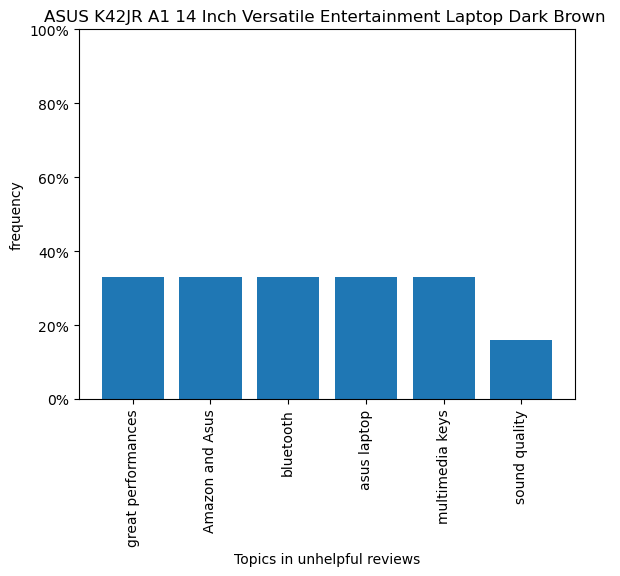

In [98]:
print(len(y_pos))
fig, ax = plt.subplots()
bars = ax.bar(x_pos, y_pos)
scaled_y = [val / max(y_pos) * 100 for val in y_pos]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')
plt.xlabel('Topics in helpful reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()


15


C:\Users\GS\AppData\Local\Temp\ipykernel_2556\1301794261.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


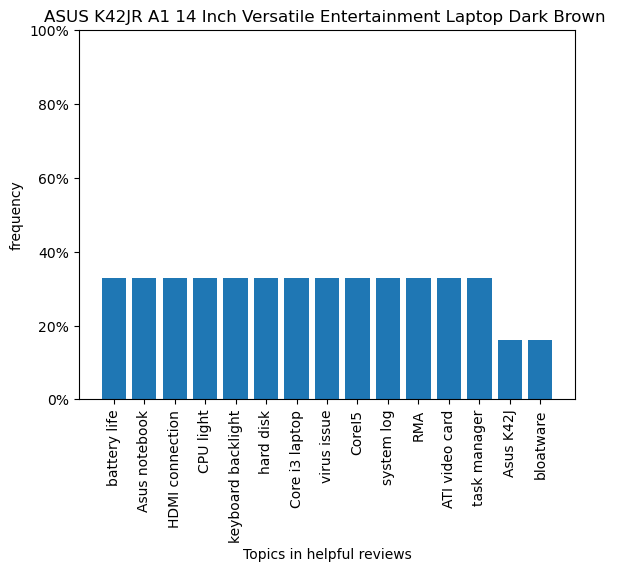

In [97]:
print(len(y_neg))
fig, ax = plt.subplots()
bars = ax.bar(x_neg, y_neg)
scaled_y = [val / max(y_neg) * 100 for val in y_neg]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')

plt.xlabel('Topics in unhelpful reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()
